In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Reshape, Dense
from keras.activations import leaky_relu
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import tensorflow as tf

In [ ]:
def plot_loss_history(hist):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4.5), dpi=90)
    ax.plot(hist.history['loss'], label='train loss')
    ax.plot(hist.history['val_loss'], label = 'validation loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    fig.tight_layout()
    plt.savefig('p1.png', dpi=200)
    plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

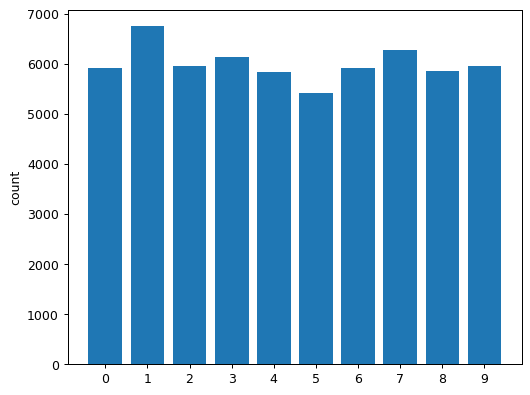

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5), dpi=90)
ax.hist(y_train, bins=np.arange(-0.5, 10, 1), rwidth=0.8)
ax.set_xticks(range(10))
# ax.set_xlim([-0.6, 9.6])
ax.set_ylabel('count')
fig.tight_layout()
plt.show()

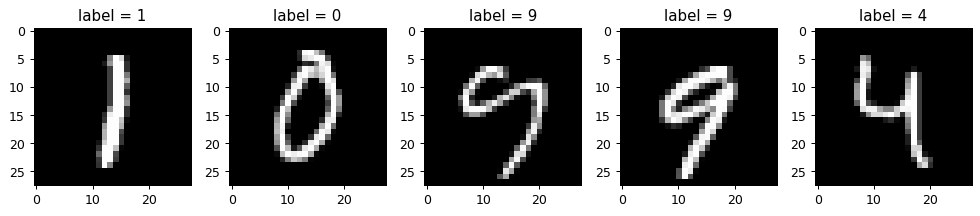

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(11, 4), dpi=90)
indxs = np.random.randint(0, X_train.shape[0], 5)

for i in range(5):
    axes[i].imshow(X_train[indxs[i]], cmap='gray')
    axes[i].set_title(f'label = {y_train[indxs[i]]}')

fig.tight_layout()
plt.show()

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(500, activation=leaky_relu),
    Dense(100, activation=leaky_relu),
    Dense(30, activation=leaky_relu)
])

decoder = Sequential([
    Dense(100, activation=leaky_relu, input_shape=(30,)),
    Dense(500, activation=leaky_relu),
    Dense(28*28, activation='sigmoid'),
    Reshape((28, 28))
])

input_layer = Input(shape=(28, 28))
autoencoder = Model(
    input_layer,
    decoder(encoder(input_layer))
)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

encoder.compile()
decoder.compile()

hist = autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_test, X_test))

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.1223 - val_loss: 0.0931
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0897 - val_loss: 0.0861
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0850 - val_loss: 0.0832
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0826 - val_loss: 0.0814
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0811 - val_loss: 0.0807
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0800 - val_loss: 0.0795
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0792 - val_loss: 0.0791
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0785 - val_loss: 0.0782
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0780 - val_loss: 0.0781
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.07

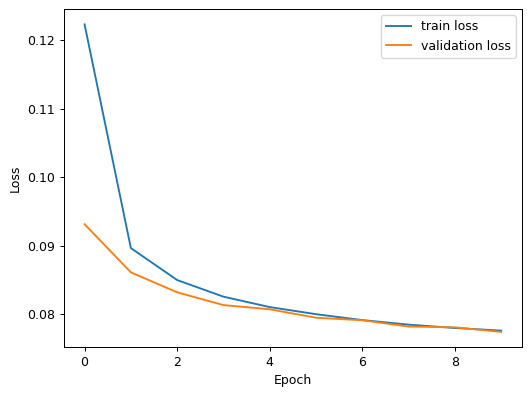

In [ ]:
plot_loss_history(hist)

1/1 [==============================] - 0s 59ms/step


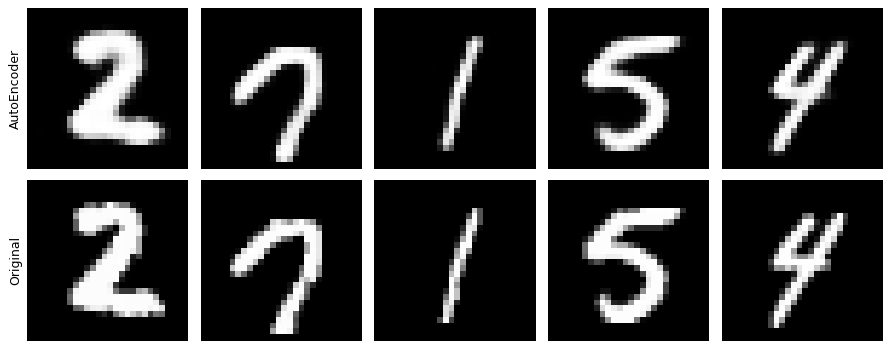

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4), dpi=90)
indxs = np.random.randint(0, X_test.shape[0], 5)
test_inputs = tf.convert_to_tensor(X_test[indxs])
test_outputs = decoder.predict(encoder.predict(test_inputs))

for i in range(5):
    axes[0, i].imshow(test_outputs[i], cmap='gray')
    axes[0, i].get_xaxis().set_ticks([])
    axes[0, i].get_yaxis().set_ticks([])
    axes[1, i].imshow(test_inputs[i], cmap='gray')
    axes[1, i].get_xaxis().set_ticks([])
    axes[1, i].get_yaxis().set_ticks([])

axes[0, 0].set_ylabel('AutoEncoder')
axes[1, 0].set_ylabel('Original')

fig.tight_layout()
plt.show()

In [ ]:
latent_train = encoder.predict(X_train)
latent_test = encoder.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [ ]:
classifier = Sequential([
    Dense(24, activation=leaky_relu, input_shape=(30,)),
    Dense(16, activation=leaky_relu),
    Dense(10, activation='softmax')
])

classifier.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = classifier.fit(latent_train, y_train, epochs=10, validation_data=(latent_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7235 - accuracy: 0.7829 - val_loss: 0.3784 - val_accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3357 - accuracy: 0.8964 - val_loss: 0.2725 - val_accuracy: 0.9205
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2879 - accuracy: 0.9126 - val_loss: 0.2571 - val_accuracy: 0.9224
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2653 - accuracy: 0.9192 - val_loss: 0.2441 - val_accuracy: 0.9238
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2477 - accuracy: 0.9237 - val_loss: 0.2192 - val_accuracy: 0.9354
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2340 - accuracy: 0.9294 - val_loss: 0.1993 - val_accuracy: 0.9412
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2224 - accuracy: 0.9331 - val_loss: 0.2029 - val_accuracy:

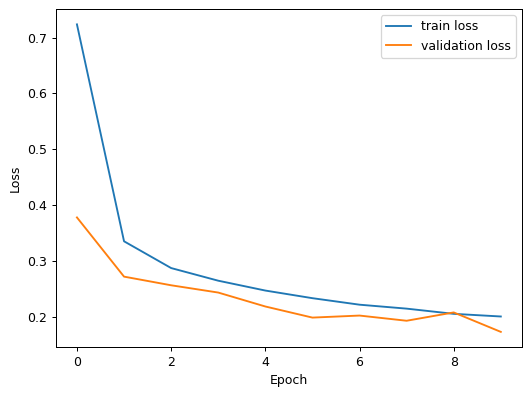

In [ ]:
plot_loss_history(hist)

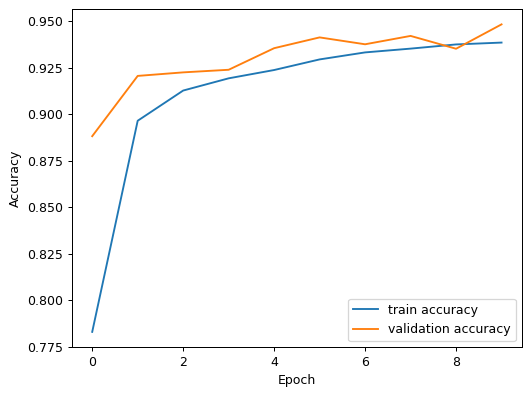

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4.5), dpi=90)
ax.plot(hist.history['accuracy'], label='train accuracy')
ax.plot(hist.history['val_accuracy'], label = 'validation accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
fig.tight_layout()
plt.show()

In [ ]:
def clf_predict(X):
    return np.argmax(classifier.predict(encoder.predict(X)), axis=1)

1/1 [==============================] - 0s 57ms/step


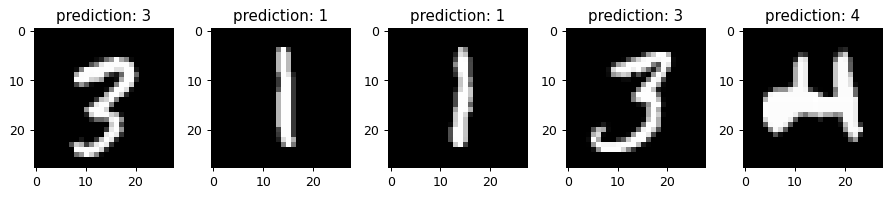

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4), dpi=90)
indxs = np.random.randint(0, X_test.shape[0], 5)
test_inputs = tf.convert_to_tensor(X_test[indxs])
test_outputs = clf_predict(test_inputs)

for i in range(5):
    axes[i].imshow(test_inputs[i], cmap='gray')
    axes[i].set_title(f'prediction: {test_outputs[i]}')

fig.tight_layout()
plt.show()

In [ ]:
def draw_confusion_matrix(matrix):
    green = (30, 200, 40, 160)
    red = (255, 25, 0, 140)

    x = matrix.shape[1]
    y = matrix.shape[0]

    colors = [[green if i==j else red for i in range(x)] for j in range(y)]
    colors = np.array(colors).astype(np.uint8)

    fig, ax = plt.subplots(figsize=(6, 6), dpi=90)
    ax.imshow(colors)

    ax.set_xticks(np.arange(x), labels=range(x))
    ax.set_yticks(np.arange(y), labels=range(y))
    
    ax.set_xticks(np.arange(-.5, x, 1), minor=True)
    ax.set_yticks(np.arange(-.5, y, 1), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
    ax.tick_params(which='minor', bottom=False, left=False)

    ax.set_xlabel("prediction")
    ax.set_ylabel("label")

    for i in range(y):
        for j in range(x):
            text = ax.text(j, i, matrix[i][j], ha="center", va="center", color='black')

    ax.set_title("Confusion Matrix")
    fig.tight_layout()
    plt.savefig('p1.png', dpi=200)
    plt.show()

313/313 [==============================] - 1s 2ms/step


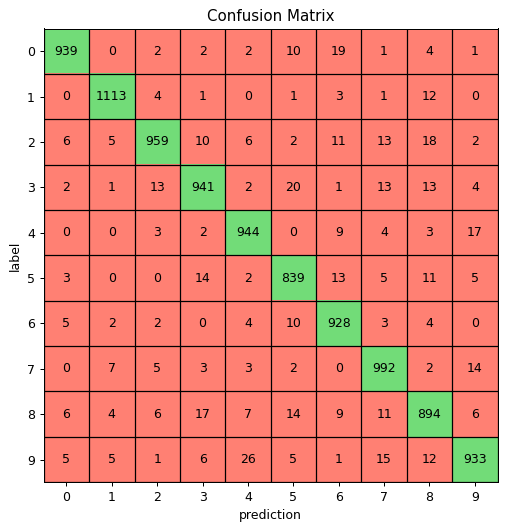

In [ ]:
draw_confusion_matrix(
    confusion_matrix(y_test, clf_predict(X_test))
)